# **1. Import Libraries**

In [12]:
import numpy as np
import polars as pl
import pandas as pd

# **2. Load Datasets**

In [63]:
data1_pl = pl.read_csv(
    'dataset1_completion_rate.csv',
    separator=";",
    skip_rows=2,              
)

data2_pl = pl.read_csv(
    'dataset2_cohort_survival_rate.csv',
    separator=";",
    skip_rows=2,              
)

data3_pl = pl.read_csv(
    'dataset3_gender_parity_index.csv',
    separator=";",
    skip_rows=2,              
)

data4_pl = pl.read_csv(
    'dataset4_participation_rate.csv',
    separator=";",
    skip_rows=2,              
)

# **3. Data Cleaning and Preperation**

## *Dataset 1: Completion Rate* 

### 1. Dimensionality Reduction

In [64]:
data1_pl = data1_pl.drop('Indicator','2000','2001','2024','2025')
data1_pl = data1_pl.filter((pl.col('Geolocation') != 'PHILIPPINES') & (pl.col('Sex') != 'Both Sexes'))

data1_pl

Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Elementary""","""Female""","""87.7""","""87.3""","""85.5""","""85.0""","""91.3""","""89.4""","""87.5""","""83.1""","""86.5""","""85.9""","""83.8""","""81.3""","""77.6""","""84.9""","""87.4""","""96.1""",100.0,95.7,71.6,99.8,93.5,95.4
"""..National Capital Region (NCR…","""Elementary""","""Male""","""81.3""","""80.6""","""79.0""","""80.2""","""85.8""","""81.3""","""82.9""","""76.5""","""79.5""","""79.8""","""76.6""","""76.4""","""72.1""","""79.9""","""84.6""","""93.4""",97.9,94.2,67.3,99.7,94.7,93.4
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Female""","""82.1""","""78.9""","""83.3""","""69.9""","""74.0""","""86.0""","""84.9""","""80.8""","""81.5""","""84.5""","""82.1""","""80.4""","""81.7""","""77.8""","""84.5""","""94.1""",96.1,90.3,77.6,100.0,97.3,92.5
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Male""","""68.9""","""67.7""","""71.5""","""61.8""","""66.6""","""71.6""","""74.4""","""70.9""","""70.6""","""73.8""","""71.5""","""72.4""","""73.0""","""70.8""","""76.1""","""87.2""",89.5,84.4,69.9,100.0,98.4,86.2
"""..National Capital Region (NCR…","""Secondary (Senior High School)""","""Female""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",86.9,79.6,61.9,98.2,85.5,85.4
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Bangsamoro Autonomous Region…","""Elementary""","""Male""","""41.0""","""26.6""","""29.2""","""34.9""","""26.1""","""37.7""","""34.6""","""33.1""","""36.8""","""22.0""","""24.5""","""36.4""","""33.9""","""34.2""","""61.8""","""52.8""",74.2,72.6,61.1,84.1,89.7,62.5
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Female""","""71.5""","""56.7""","""44.0""","""54.8""","""37.8""","""66.9""","""55.4""","""67.6""","""61.8""","""59.9""","""54.1""","""58.7""","""50.3""","""65.0""","""79.9""","""62.1""",93.6,88.2,77.5,97.2,85.5,73.5
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Male""","""49.7""","""69.5""","""46.8""","""50.9""","""32.2""","""63.5""","""51.3""","""62.6""","""56.6""","""51.2""","""50.6""","""52.9""","""46.7""","""62.6""","""77.1""","""62.2""",92.8,84.6,67.4,93.5,83.7,60.4


### 2. Imputing Null Values

In [65]:
data1_pl = data1_pl.with_columns(
    pl.when(pl.col('Level of Education') == 'Secondary (Senior High School)')
    .then(pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']).str.replace_all("..",'0'))
    .otherwise(pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']))
)

data1_pl

Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Elementary""","""Female""","""87.7""","""87.3""","""85.5""","""85.0""","""91.3""","""89.4""","""87.5""","""83.1""","""86.5""","""85.9""","""83.8""","""81.3""","""77.6""","""84.9""","""87.4""","""96.1""",100.0,95.7,71.6,99.8,93.5,95.4
"""..National Capital Region (NCR…","""Elementary""","""Male""","""81.3""","""80.6""","""79.0""","""80.2""","""85.8""","""81.3""","""82.9""","""76.5""","""79.5""","""79.8""","""76.6""","""76.4""","""72.1""","""79.9""","""84.6""","""93.4""",97.9,94.2,67.3,99.7,94.7,93.4
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Female""","""82.1""","""78.9""","""83.3""","""69.9""","""74.0""","""86.0""","""84.9""","""80.8""","""81.5""","""84.5""","""82.1""","""80.4""","""81.7""","""77.8""","""84.5""","""94.1""",96.1,90.3,77.6,100.0,97.3,92.5
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Male""","""68.9""","""67.7""","""71.5""","""61.8""","""66.6""","""71.6""","""74.4""","""70.9""","""70.6""","""73.8""","""71.5""","""72.4""","""73.0""","""70.8""","""76.1""","""87.2""",89.5,84.4,69.9,100.0,98.4,86.2
"""..National Capital Region (NCR…","""Secondary (Senior High School)""","""Female""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",86.9,79.6,61.9,98.2,85.5,85.4
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Bangsamoro Autonomous Region…","""Elementary""","""Male""","""41.0""","""26.6""","""29.2""","""34.9""","""26.1""","""37.7""","""34.6""","""33.1""","""36.8""","""22.0""","""24.5""","""36.4""","""33.9""","""34.2""","""61.8""","""52.8""",74.2,72.6,61.1,84.1,89.7,62.5
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Female""","""71.5""","""56.7""","""44.0""","""54.8""","""37.8""","""66.9""","""55.4""","""67.6""","""61.8""","""59.9""","""54.1""","""58.7""","""50.3""","""65.0""","""79.9""","""62.1""",93.6,88.2,77.5,97.2,85.5,73.5
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Male""","""49.7""","""69.5""","""46.8""","""50.9""","""32.2""","""63.5""","""51.3""","""62.6""","""56.6""","""51.2""","""50.6""","""52.9""","""46.7""","""62.6""","""77.1""","""62.2""",92.8,84.6,67.4,93.5,83.7,60.4


### 3. Standardizing Columns

In [66]:
data1_pl = data1_pl.with_columns(
    pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']).cast(pl.Float64)
)

data1_pl

Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Elementary""","""Female""",87.7,87.3,85.5,85.0,91.3,89.4,87.5,83.1,86.5,85.9,83.8,81.3,77.6,84.9,87.4,96.1,100.0,95.7,71.6,99.8,93.5,95.4
"""..National Capital Region (NCR…","""Elementary""","""Male""",81.3,80.6,79.0,80.2,85.8,81.3,82.9,76.5,79.5,79.8,76.6,76.4,72.1,79.9,84.6,93.4,97.9,94.2,67.3,99.7,94.7,93.4
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Female""",82.1,78.9,83.3,69.9,74.0,86.0,84.9,80.8,81.5,84.5,82.1,80.4,81.7,77.8,84.5,94.1,96.1,90.3,77.6,100.0,97.3,92.5
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Male""",68.9,67.7,71.5,61.8,66.6,71.6,74.4,70.9,70.6,73.8,71.5,72.4,73.0,70.8,76.1,87.2,89.5,84.4,69.9,100.0,98.4,86.2
"""..National Capital Region (NCR…","""Secondary (Senior High School)""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.9,79.6,61.9,98.2,85.5,85.4
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Bangsamoro Autonomous Region…","""Elementary""","""Male""",41.0,26.6,29.2,34.9,26.1,37.7,34.6,33.1,36.8,22.0,24.5,36.4,33.9,34.2,61.8,52.8,74.2,72.6,61.1,84.1,89.7,62.5
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Female""",71.5,56.7,44.0,54.8,37.8,66.9,55.4,67.6,61.8,59.9,54.1,58.7,50.3,65.0,79.9,62.1,93.6,88.2,77.5,97.2,85.5,73.5
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Male""",49.7,69.5,46.8,50.9,32.2,63.5,51.3,62.6,56.6,51.2,50.6,52.9,46.7,62.6,77.1,62.2,92.8,84.6,67.4,93.5,83.7,60.4


### 4. Simplify Feature Names

In [67]:
# Geolocation

'''
..National Capital Region (NCR) = NCR
..Cordillera Administrative Region (CAR) = CAR
..MIMAROPA Region = Region IV-B
..Bangsamoro Autonomous Region in Muslim Mindanao (BARMM) = BARMM

'''

data1_pl = data1_pl.with_columns(
    pl.col('Geolocation').str.replace('..','')
)

data1_pl = data1_pl.with_columns(
    pl.col("Geolocation").replace({'National Capital Region (NCR)':'NCR',
   'Cordillera Administrative Region (CAR)':'CAR',
   'MIMAROPA Region':'Region IV-B',
   'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)':'BARMM'})
)


In [68]:
# Level of Education

'''
Elementary = Elementary
Secondary (Junior High School) = Junior High
Secondary (Senior High School) = Senior High

'''

data1_pl = data1_pl.with_columns(
    pl.col("Level of Education").replace({'Secondary (Junior High School)':'Junior High',
   'Secondary (Senior High School)':'Senior High'})
)

data1_pl


Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""NCR""","""Elementary""","""Female""",87.7,87.3,85.5,85.0,91.3,89.4,87.5,83.1,86.5,85.9,83.8,81.3,77.6,84.9,87.4,96.1,100.0,95.7,71.6,99.8,93.5,95.4
"""NCR""","""Elementary""","""Male""",81.3,80.6,79.0,80.2,85.8,81.3,82.9,76.5,79.5,79.8,76.6,76.4,72.1,79.9,84.6,93.4,97.9,94.2,67.3,99.7,94.7,93.4
"""NCR""","""Junior High""","""Female""",82.1,78.9,83.3,69.9,74.0,86.0,84.9,80.8,81.5,84.5,82.1,80.4,81.7,77.8,84.5,94.1,96.1,90.3,77.6,100.0,97.3,92.5
"""NCR""","""Junior High""","""Male""",68.9,67.7,71.5,61.8,66.6,71.6,74.4,70.9,70.6,73.8,71.5,72.4,73.0,70.8,76.1,87.2,89.5,84.4,69.9,100.0,98.4,86.2
"""NCR""","""Senior High""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.9,79.6,61.9,98.2,85.5,85.4
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""BARMM""","""Elementary""","""Male""",41.0,26.6,29.2,34.9,26.1,37.7,34.6,33.1,36.8,22.0,24.5,36.4,33.9,34.2,61.8,52.8,74.2,72.6,61.1,84.1,89.7,62.5
"""BARMM""","""Junior High""","""Female""",71.5,56.7,44.0,54.8,37.8,66.9,55.4,67.6,61.8,59.9,54.1,58.7,50.3,65.0,79.9,62.1,93.6,88.2,77.5,97.2,85.5,73.5
"""BARMM""","""Junior High""","""Male""",49.7,69.5,46.8,50.9,32.2,63.5,51.3,62.6,56.6,51.2,50.6,52.9,46.7,62.6,77.1,62.2,92.8,84.6,67.4,93.5,83.7,60.4


### 5. Dataset Melting

In [69]:
data1_pl = data1_pl.melt(
    id_vars=["Geolocation", "Level of Education", "Sex"],         
    value_vars=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011',
    '2012','2013','2013','2015','2016','2017','2018','2019','2020','2021','2022','2023'], 
    variable_name="Year", 
    value_name="Completion_Rate"       
)

data1_pl = data1_pl.with_columns(
    pl.col('Year').cast(pl.Int64)
)
data1_pl

<positron-console-cell-69>:1: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`


Geolocation,Level of Education,Sex,Year,Completion_Rate
str,str,str,i64,f64
"""NCR""","""Elementary""","""Female""",2002,87.7
"""NCR""","""Elementary""","""Male""",2002,81.3
"""NCR""","""Junior High""","""Female""",2002,82.1
"""NCR""","""Junior High""","""Male""",2002,68.9
"""NCR""","""Senior High""","""Female""",2002,0.0
…,…,…,…,…
"""BARMM""","""Elementary""","""Male""",2023,62.5
"""BARMM""","""Junior High""","""Female""",2023,73.5
"""BARMM""","""Junior High""","""Male""",2023,60.4


## *Dataset 2: Cohort Survival Rate*

### 1. Dimensionality Reduction

In [70]:
data2_pl = data2_pl.drop('Indicator','2000','2001','2024','2025')
data2_pl = data2_pl.filter((pl.col('Geolocation') != 'PHILIPPINES') & (pl.col('Sex') != 'Both Sexes'))

data2_pl

Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Elementary""","""Female""","""87.7""","""87.5""","""86.4""","""86.0""","""92.4""","""91.5""","""89.3""","""85.3""","""88.8""","""88.6""","""85.6""","""83.0""","""83.7""","""93.2""","""88.5""","""97.3""",100.0,95.9,72.0,100.0,93.7,95.7
"""..National Capital Region (NCR…","""Elementary""","""Male""","""81.3""","""81.2""","""80.2""","""81.2""","""87.1""","""84.1""","""85.6""","""79.6""","""82.7""","""83.4""","""79.3""","""78.8""","""78.5""","""88.0""","""86.2""","""94.6""",97.9,94.4,67.8,100.0,94.7,93.8
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Female""","""82.8""","""84.3""","""88.6""","""75.8""","""79.6""","""90.4""","""89.3""","""86.0""","""87.1""","""89.2""","""86.3""","""83.9""","""85.4""","""89.6""","""86.5""","""94.9""",96.1,91.6,78.5,100.0,97.4,93.6
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Male""","""71.1""","""75.5""","""78.0""","""67.9""","""74.0""","""77.3""","""80.2""","""76.8""","""76.5""","""79.7""","""76.4""","""76.6""","""77.3""","""82.3""","""78.8""","""87.9""",89.5,85.7,70.8,100.0,98.4,87.2
"""..National Capital Region (NCR…","""Secondary (Senior High School)""","""Female""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",88.4,81.0,63.8,99.3,89.2,87.7
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Bangsamoro Autonomous Region…","""Elementary""","""Male""","""43.8""","""29.4""","""33.3""","""36.2""","""28.2""","""41.4""","""37.9""","""34.6""","""38.0""","""27.4""","""25.3""","""36.4""","""34.4""","""36.4""","""64.6""","""53.5""",74.2,73.1,62.4,85.5,89.8,63.7
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Female""","""76.7""","""63.5""","""52.4""","""63.3""","""43.7""","""74.9""","""71.9""","""69.6""","""70.1""","""70.4""","""55.7""","""63.3""","""54.1""","""75.1""","""82.2""","""63.2""",94.5,89.1,78.5,99.5,86.8,75.2
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Male""","""54.0""","""79.2""","""57.3""","""60.5""","""38.4""","""71.8""","""67.2""","""65.9""","""66.4""","""61.7""","""52.3""","""56.9""","""50.6""","""71.8""","""79.2""","""63.3""",93.6,85.4,68.9,95.8,84.6,62.5


### 2. Imputing Null Values

In [71]:
data2_pl = data2_pl.with_columns(
    pl.when(pl.col('Level of Education') == 'Secondary (Senior High School)')
    .then(pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']).str.replace_all("..",'0'))
    .otherwise(pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']))
)

data2_pl

Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Elementary""","""Female""","""87.7""","""87.5""","""86.4""","""86.0""","""92.4""","""91.5""","""89.3""","""85.3""","""88.8""","""88.6""","""85.6""","""83.0""","""83.7""","""93.2""","""88.5""","""97.3""",100.0,95.9,72.0,100.0,93.7,95.7
"""..National Capital Region (NCR…","""Elementary""","""Male""","""81.3""","""81.2""","""80.2""","""81.2""","""87.1""","""84.1""","""85.6""","""79.6""","""82.7""","""83.4""","""79.3""","""78.8""","""78.5""","""88.0""","""86.2""","""94.6""",97.9,94.4,67.8,100.0,94.7,93.8
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Female""","""82.8""","""84.3""","""88.6""","""75.8""","""79.6""","""90.4""","""89.3""","""86.0""","""87.1""","""89.2""","""86.3""","""83.9""","""85.4""","""89.6""","""86.5""","""94.9""",96.1,91.6,78.5,100.0,97.4,93.6
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Male""","""71.1""","""75.5""","""78.0""","""67.9""","""74.0""","""77.3""","""80.2""","""76.8""","""76.5""","""79.7""","""76.4""","""76.6""","""77.3""","""82.3""","""78.8""","""87.9""",89.5,85.7,70.8,100.0,98.4,87.2
"""..National Capital Region (NCR…","""Secondary (Senior High School)""","""Female""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",88.4,81.0,63.8,99.3,89.2,87.7
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Bangsamoro Autonomous Region…","""Elementary""","""Male""","""43.8""","""29.4""","""33.3""","""36.2""","""28.2""","""41.4""","""37.9""","""34.6""","""38.0""","""27.4""","""25.3""","""36.4""","""34.4""","""36.4""","""64.6""","""53.5""",74.2,73.1,62.4,85.5,89.8,63.7
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Female""","""76.7""","""63.5""","""52.4""","""63.3""","""43.7""","""74.9""","""71.9""","""69.6""","""70.1""","""70.4""","""55.7""","""63.3""","""54.1""","""75.1""","""82.2""","""63.2""",94.5,89.1,78.5,99.5,86.8,75.2
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Male""","""54.0""","""79.2""","""57.3""","""60.5""","""38.4""","""71.8""","""67.2""","""65.9""","""66.4""","""61.7""","""52.3""","""56.9""","""50.6""","""71.8""","""79.2""","""63.3""",93.6,85.4,68.9,95.8,84.6,62.5


### 3. Standardizing Columns

In [72]:
data2_pl = data2_pl.with_columns(
    pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']).cast(pl.Float64)
)

data2_pl

Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Elementary""","""Female""",87.7,87.5,86.4,86.0,92.4,91.5,89.3,85.3,88.8,88.6,85.6,83.0,83.7,93.2,88.5,97.3,100.0,95.9,72.0,100.0,93.7,95.7
"""..National Capital Region (NCR…","""Elementary""","""Male""",81.3,81.2,80.2,81.2,87.1,84.1,85.6,79.6,82.7,83.4,79.3,78.8,78.5,88.0,86.2,94.6,97.9,94.4,67.8,100.0,94.7,93.8
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Female""",82.8,84.3,88.6,75.8,79.6,90.4,89.3,86.0,87.1,89.2,86.3,83.9,85.4,89.6,86.5,94.9,96.1,91.6,78.5,100.0,97.4,93.6
"""..National Capital Region (NCR…","""Secondary (Junior High School)""","""Male""",71.1,75.5,78.0,67.9,74.0,77.3,80.2,76.8,76.5,79.7,76.4,76.6,77.3,82.3,78.8,87.9,89.5,85.7,70.8,100.0,98.4,87.2
"""..National Capital Region (NCR…","""Secondary (Senior High School)""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.4,81.0,63.8,99.3,89.2,87.7
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Bangsamoro Autonomous Region…","""Elementary""","""Male""",43.8,29.4,33.3,36.2,28.2,41.4,37.9,34.6,38.0,27.4,25.3,36.4,34.4,36.4,64.6,53.5,74.2,73.1,62.4,85.5,89.8,63.7
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Female""",76.7,63.5,52.4,63.3,43.7,74.9,71.9,69.6,70.1,70.4,55.7,63.3,54.1,75.1,82.2,63.2,94.5,89.1,78.5,99.5,86.8,75.2
"""..Bangsamoro Autonomous Region…","""Secondary (Junior High School)""","""Male""",54.0,79.2,57.3,60.5,38.4,71.8,67.2,65.9,66.4,61.7,52.3,56.9,50.6,71.8,79.2,63.3,93.6,85.4,68.9,95.8,84.6,62.5


### 4. Simplifying Feature Names

In [73]:
# Geolocation

'''
..National Capital Region (NCR) = NCR
..Cordillera Administration Region (CAR) = CAR
..MIMAROPA Region = Region IV-B
..Bangsamoro Autonomous Region in Muslim Mindanao (BARMM) = BARMM

'''

data2_pl = data2_pl.with_columns(
    pl.col('Geolocation').str.replace('..','')
)

data2_pl = data2_pl.with_columns(
    pl.col("Geolocation").replace({'National Capital Region (NCR)':'NCR',
   'Cordillera Administration Region (CAR)':'CAR',
   'MIMAROPA Region':'Region IV-B',
   'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)':'BARMM'})
)

In [74]:
# Level of Education

'''
Elementary = Elementary
Secondary (Junior High School) = Junior High
Secondary (Senior High School) = Senior High

'''

data2_pl = data2_pl.with_columns(
    pl.col("Level of Education").replace({'Secondary (Junior High School)':'Junior High',
   'Secondary (Senior High School)':'Senior High'})
)

data2_pl

Geolocation,Level of Education,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""NCR""","""Elementary""","""Female""",87.7,87.5,86.4,86.0,92.4,91.5,89.3,85.3,88.8,88.6,85.6,83.0,83.7,93.2,88.5,97.3,100.0,95.9,72.0,100.0,93.7,95.7
"""NCR""","""Elementary""","""Male""",81.3,81.2,80.2,81.2,87.1,84.1,85.6,79.6,82.7,83.4,79.3,78.8,78.5,88.0,86.2,94.6,97.9,94.4,67.8,100.0,94.7,93.8
"""NCR""","""Junior High""","""Female""",82.8,84.3,88.6,75.8,79.6,90.4,89.3,86.0,87.1,89.2,86.3,83.9,85.4,89.6,86.5,94.9,96.1,91.6,78.5,100.0,97.4,93.6
"""NCR""","""Junior High""","""Male""",71.1,75.5,78.0,67.9,74.0,77.3,80.2,76.8,76.5,79.7,76.4,76.6,77.3,82.3,78.8,87.9,89.5,85.7,70.8,100.0,98.4,87.2
"""NCR""","""Senior High""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.4,81.0,63.8,99.3,89.2,87.7
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""BARMM""","""Elementary""","""Male""",43.8,29.4,33.3,36.2,28.2,41.4,37.9,34.6,38.0,27.4,25.3,36.4,34.4,36.4,64.6,53.5,74.2,73.1,62.4,85.5,89.8,63.7
"""BARMM""","""Junior High""","""Female""",76.7,63.5,52.4,63.3,43.7,74.9,71.9,69.6,70.1,70.4,55.7,63.3,54.1,75.1,82.2,63.2,94.5,89.1,78.5,99.5,86.8,75.2
"""BARMM""","""Junior High""","""Male""",54.0,79.2,57.3,60.5,38.4,71.8,67.2,65.9,66.4,61.7,52.3,56.9,50.6,71.8,79.2,63.3,93.6,85.4,68.9,95.8,84.6,62.5


### 5. Dataset Melting

In [75]:
data2_pl = data2_pl.melt(
    id_vars=["Geolocation", "Level of Education", "Sex"],         
    value_vars=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011',
    '2012','2013','2013','2015','2016','2017','2018','2019','2020','2021','2022','2023'], 
    variable_name="Year", 
    value_name="Cohort_Survival_Rate"       
)

data2_pl = data2_pl.with_columns(
    pl.col('Year').cast(pl.Int64)
)
data2_pl

<positron-console-cell-75>:1: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`


Geolocation,Level of Education,Sex,Year,Cohort_Survival_Rate
str,str,str,i64,f64
"""NCR""","""Elementary""","""Female""",2002,87.7
"""NCR""","""Elementary""","""Male""",2002,81.3
"""NCR""","""Junior High""","""Female""",2002,82.8
"""NCR""","""Junior High""","""Male""",2002,71.1
"""NCR""","""Senior High""","""Female""",2002,0.0
…,…,…,…,…
"""BARMM""","""Elementary""","""Male""",2023,63.7
"""BARMM""","""Junior High""","""Female""",2023,75.2
"""BARMM""","""Junior High""","""Male""",2023,62.5


## *Dataset 3: Gender Parity Index*

### 1. Dimensionality Reduction

In [76]:
data3_pl = data3_pl.drop('2000','2001','2024','2025')
data3_pl = data3_pl.filter((pl.col('Geolocation') != 'PHILIPPINES') & (pl.col('Level of education') != 'Ratio of girls to boys in tertiary education'))

data3_pl


Geolocation,Level of education,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str
"""..National Capital Region (NCR…","""Ratio of girls to boys in prim…","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""",0.9,0.9,0.9,0.9,0.9,0.9,0.9,"""0.9"""
"""..National Capital Region (NCR…","""Ratio of girls to boys in seco…","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""
"""..National Capital Region (NCR…","""Ratio of girls to boys in seco…","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",1.1,1.1,1.1,1.1,1.1,1.1,1.1,"""1.0"""
"""..Cordillera Administrative Re…","""Ratio of girls to boys in prim…","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""",0.9,0.9,0.9,0.9,0.9,0.9,0.9,"""0.9"""
"""..Cordillera Administrative Re…","""Ratio of girls to boys in seco…","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.0""","""1.1""","""1.1""","""1.0""","""1.0""","""1.0""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Region XIII""","""Ratio of girls to boys in seco…","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""
"""..Region XIII""","""Ratio of girls to boys in seco…","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",1.1,1.1,1.1,1.0,1.1,1.1,1.0,"""1.0"""
"""..Bangsamoro Autonomous Region…","""Ratio of girls to boys in prim…","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""


### 2. Imputing Null Values

In [77]:
data3_pl = data3_pl.with_columns(
    pl.when(pl.col('Level of education') == 'Ratio of girls to boys in secondary education (SHS)')
    .then(pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015']).str.replace_all("..",'0'))
    .otherwise(pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015']))
)

data3_pl

Geolocation,Level of education,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str
"""..National Capital Region (NCR…","""Ratio of girls to boys in prim…","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""",0.9,0.9,0.9,0.9,0.9,0.9,0.9,"""0.9"""
"""..National Capital Region (NCR…","""Ratio of girls to boys in seco…","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""
"""..National Capital Region (NCR…","""Ratio of girls to boys in seco…","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",1.1,1.1,1.1,1.1,1.1,1.1,1.1,"""1.0"""
"""..Cordillera Administrative Re…","""Ratio of girls to boys in prim…","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""","""0.9""",0.9,0.9,0.9,0.9,0.9,0.9,0.9,"""0.9"""
"""..Cordillera Administrative Re…","""Ratio of girls to boys in seco…","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.0""","""1.1""","""1.1""","""1.0""","""1.0""","""1.0""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Region XIII""","""Ratio of girls to boys in seco…","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""","""1.0""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""
"""..Region XIII""","""Ratio of girls to boys in seco…","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",1.1,1.1,1.1,1.0,1.1,1.1,1.0,"""1.0"""
"""..Bangsamoro Autonomous Region…","""Ratio of girls to boys in prim…","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""","""1.1""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""1.0"""


### 3. Standardizing Columns

In [78]:
data3_pl = data3_pl.with_columns(
    pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2023']).cast(pl.Float64)
)

data3_pl

Geolocation,Level of education,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Ratio of girls to boys in prim…",0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
"""..National Capital Region (NCR…","""Ratio of girls to boys in seco…",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""..National Capital Region (NCR…","""Ratio of girls to boys in seco…",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0
"""..Cordillera Administrative Re…","""Ratio of girls to boys in prim…",0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
"""..Cordillera Administrative Re…","""Ratio of girls to boys in seco…",1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Region XIII""","""Ratio of girls to boys in seco…",1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""..Region XIII""","""Ratio of girls to boys in seco…",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,1.1,1.1,1.0,1.1,1.1,1.0,1.0
"""..Bangsamoro Autonomous Region…","""Ratio of girls to boys in prim…",1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 4. Simplifying Feature Names

In [79]:
# Geolocation

'''
..National Capital Region (NCR) = NCR
..Cordillera Administration Region (CAR) = CAR
..MIMAROPA Region = Region IV-B
..Bangsamoro Autonomous Region in Muslim Mindanao (BARMM) = BARMM

'''

data3_pl = data3_pl.with_columns(
    pl.col('Geolocation').str.replace('..','')
)

data3_pl = data3_pl.with_columns(
    pl.col("Geolocation").replace({'National Capital Region (NCR)':'NCR',
   'Cordillera Administrative Region (CAR)':'CAR',
   'MIMAROPA Region':'Region IV-B',
   'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)':'BARMM'})
)

In [80]:
# Level of education

'''
Ratio of girls to boys in primary education = Elementary
Ratio of girls to boys in secondary education (JHS) = Junior High
Ratio of girls to boys in secondary education (SHS) = Senior High

'''
data3_pl = data3_pl.rename({'Level of education':'Level of Education'})

data3_pl = data3_pl.with_columns(
    pl.col("Level of Education").replace({'Ratio of girls to boys in primary education':'Elementary',
   'Ratio of girls to boys in secondary education (JHS)':'Junior High',
   'Ratio of girls to boys in secondary education (SHS)':'Senior High'})
)

data3_pl


Geolocation,Level of Education,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""NCR""","""Elementary""",0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
"""NCR""","""Junior High""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""NCR""","""Senior High""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0
"""CAR""","""Elementary""",0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
"""CAR""","""Junior High""",1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Region XIII""","""Junior High""",1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""Region XIII""","""Senior High""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,1.1,1.1,1.0,1.1,1.1,1.0,1.0
"""BARMM""","""Elementary""",1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 5. Dataset Melting

In [81]:
data3_pl = data3_pl.melt(
    id_vars=["Geolocation", "Level of Education"],         
    value_vars=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011',
    '2012','2013','2013','2015','2016','2017','2018','2019','2020','2021','2022','2023'], 
    variable_name="Year", 
    value_name="Gender_Parity_Index"       
)

data3_pl = data3_pl.with_columns(
    pl.col('Year').cast(pl.Int64)
)
data3_pl

<positron-console-cell-81>:1: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`


Geolocation,Level of Education,Year,Gender_Parity_Index
str,str,i64,f64
"""NCR""","""Elementary""",2002,0.9
"""NCR""","""Junior High""",2002,1.0
"""NCR""","""Senior High""",2002,0.0
"""CAR""","""Elementary""",2002,0.9
"""CAR""","""Junior High""",2002,1.1
…,…,…,…
"""Region XIII""","""Junior High""",2023,1.0
"""Region XIII""","""Senior High""",2023,1.0
"""BARMM""","""Elementary""",2023,1.0


## *Dataset 4: Participation Rate*

### 1. Dimensionality Reduction

In [82]:
data4_pl = data4_pl.drop('Indicator','2000','2001','2024','2025')
data4_pl = data4_pl.filter((pl.col('Geolocation') != 'PHILIPPINES') & (pl.col('Sex') != 'Both Sexes'))

data4_pl

Geolocation,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Girls""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",39.9,55.6,60.3,65.0,72.0,68.6,60.2,75.7,69.5,58.3,59.2,67.9,69.8,73.4
"""..National Capital Region (NCR…","""Boys""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",37.3,52.5,57.2,63.3,69.3,66.3,60.2,73.9,69.3,56.1,54.3,62.4,63.6,67.5
"""..Cordillera Administrative Re…","""Girls""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",54.7,79.8,81.5,83.3,85.7,80.1,66.2,83.0,71.9,61.8,86.4,87.9,87.1,86.1
"""..Cordillera Administrative Re…","""Boys""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",53.1,80.9,82.5,84.2,85.0,82.1,68.8,83.9,74.5,62.8,82.5,84.7,84.2,83.3
"""..Region I""","""Girls""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",79.6,81.1,82.4,78.3,85.6,77.4,62.7,82.3,72.5,57.1,81.7,81.4,80.9,80.3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Region XII""","""Boys""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",54.0,78.8,79.9,80.2,81.4,76.3,66.1,82.5,75.5,63.2,65.2,71.4,72.9,73.7
"""..Region XIII""","""Girls""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",79.8,88.4,81.5,81.8,86.6,85.6,67.8,86.1,76.0,64.3,79.1,81.8,82.8,82.4
"""..Region XIII""","""Boys""","""..""","""..""","""..""","""..""","""..""","""..""","""..""","""..""",78.1,87.5,82.4,83.1,85.2,86.6,69.7,86.2,77.3,64.3,76.1,78.9,80.5,80.2


### 2. Imputing Null Values

In [83]:
data4_pl = data4_pl.with_columns(
 
    pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009']).str.replace_all("..",'0')
)

data4_pl

Geolocation,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Girls""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",39.9,55.6,60.3,65.0,72.0,68.6,60.2,75.7,69.5,58.3,59.2,67.9,69.8,73.4
"""..National Capital Region (NCR…","""Boys""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",37.3,52.5,57.2,63.3,69.3,66.3,60.2,73.9,69.3,56.1,54.3,62.4,63.6,67.5
"""..Cordillera Administrative Re…","""Girls""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",54.7,79.8,81.5,83.3,85.7,80.1,66.2,83.0,71.9,61.8,86.4,87.9,87.1,86.1
"""..Cordillera Administrative Re…","""Boys""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",53.1,80.9,82.5,84.2,85.0,82.1,68.8,83.9,74.5,62.8,82.5,84.7,84.2,83.3
"""..Region I""","""Girls""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",79.6,81.1,82.4,78.3,85.6,77.4,62.7,82.3,72.5,57.1,81.7,81.4,80.9,80.3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Region XII""","""Boys""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",54.0,78.8,79.9,80.2,81.4,76.3,66.1,82.5,75.5,63.2,65.2,71.4,72.9,73.7
"""..Region XIII""","""Girls""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",79.8,88.4,81.5,81.8,86.6,85.6,67.8,86.1,76.0,64.3,79.1,81.8,82.8,82.4
"""..Region XIII""","""Boys""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",78.1,87.5,82.4,83.1,85.2,86.6,69.7,86.2,77.3,64.3,76.1,78.9,80.5,80.2


### 3. Standardizing Columns

In [84]:
data4_pl = data4_pl.with_columns(
    pl.col(['2002','2003','2004','2005','2006','2007',
    '2008','2009']).cast(pl.Float64)
)

data4_pl

Geolocation,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""..National Capital Region (NCR…","""Girls""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.9,55.6,60.3,65.0,72.0,68.6,60.2,75.7,69.5,58.3,59.2,67.9,69.8,73.4
"""..National Capital Region (NCR…","""Boys""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.3,52.5,57.2,63.3,69.3,66.3,60.2,73.9,69.3,56.1,54.3,62.4,63.6,67.5
"""..Cordillera Administrative Re…","""Girls""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.7,79.8,81.5,83.3,85.7,80.1,66.2,83.0,71.9,61.8,86.4,87.9,87.1,86.1
"""..Cordillera Administrative Re…","""Boys""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.1,80.9,82.5,84.2,85.0,82.1,68.8,83.9,74.5,62.8,82.5,84.7,84.2,83.3
"""..Region I""","""Girls""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6,81.1,82.4,78.3,85.6,77.4,62.7,82.3,72.5,57.1,81.7,81.4,80.9,80.3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""..Region XII""","""Boys""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,78.8,79.9,80.2,81.4,76.3,66.1,82.5,75.5,63.2,65.2,71.4,72.9,73.7
"""..Region XIII""","""Girls""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.8,88.4,81.5,81.8,86.6,85.6,67.8,86.1,76.0,64.3,79.1,81.8,82.8,82.4
"""..Region XIII""","""Boys""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.1,87.5,82.4,83.1,85.2,86.6,69.7,86.2,77.3,64.3,76.1,78.9,80.5,80.2


### 4. Simplifying Feature Names

In [85]:
# Geolocation


'''
..National Capital Region (NCR) = NCR
..Cordillera Administration Region (CAR) = CAR
..MIMAROPA Region = Region IV-B
..Bangsamoro Autonomous Region in Muslim Mindanao (BARMM) = BARMM

'''

data4_pl = data4_pl.with_columns(
    pl.col('Geolocation').str.replace('..','')
)

data4_pl = data4_pl.with_columns(
    pl.col("Geolocation").replace({'National Capital Region (NCR)':'NCR',
   'Cordillera Administrative Region (CAR)':'CAR',
   'MIMAROPA Region':'Region IV-B',
   'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)':'BARMM'})
)

In [86]:
# Sex

'''
Girls = Female
Boys = Male

'''

data4_pl = data4_pl.with_columns(
    pl.col("Sex").replace({'Girls':'Female',
   'Boys':'Male'})
)

data4_pl

Geolocation,Sex,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""NCR""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.9,55.6,60.3,65.0,72.0,68.6,60.2,75.7,69.5,58.3,59.2,67.9,69.8,73.4
"""NCR""","""Male""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.3,52.5,57.2,63.3,69.3,66.3,60.2,73.9,69.3,56.1,54.3,62.4,63.6,67.5
"""CAR""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.7,79.8,81.5,83.3,85.7,80.1,66.2,83.0,71.9,61.8,86.4,87.9,87.1,86.1
"""CAR""","""Male""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.1,80.9,82.5,84.2,85.0,82.1,68.8,83.9,74.5,62.8,82.5,84.7,84.2,83.3
"""Region I""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6,81.1,82.4,78.3,85.6,77.4,62.7,82.3,72.5,57.1,81.7,81.4,80.9,80.3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Region XII""","""Male""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,78.8,79.9,80.2,81.4,76.3,66.1,82.5,75.5,63.2,65.2,71.4,72.9,73.7
"""Region XIII""","""Female""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.8,88.4,81.5,81.8,86.6,85.6,67.8,86.1,76.0,64.3,79.1,81.8,82.8,82.4
"""Region XIII""","""Male""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.1,87.5,82.4,83.1,85.2,86.6,69.7,86.2,77.3,64.3,76.1,78.9,80.5,80.2


### 5. Dataset Melting

In [87]:
data4_pl = data4_pl.melt(
    id_vars=["Geolocation", "Sex"],         
    value_vars=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011',
    '2012','2013','2013','2015','2016','2017','2018','2019','2020','2021','2022','2023'], 
    variable_name="Year", 
    value_name="Participation_Rate"       
)

data4_pl = data4_pl.with_columns(
    pl.col('Year').cast(pl.Int64)
)
data4_pl

<positron-console-cell-87>:1: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`


Geolocation,Sex,Year,Participation_Rate
str,str,i64,f64
"""NCR""","""Female""",2002,0.0
"""NCR""","""Male""",2002,0.0
"""CAR""","""Female""",2002,0.0
"""CAR""","""Male""",2002,0.0
"""Region I""","""Female""",2002,0.0
…,…,…,…
"""Region XII""","""Male""",2023,73.7
"""Region XIII""","""Female""",2023,82.4
"""Region XIII""","""Male""",2023,80.2


## *Final Datasets: **Philippines Primary and Secondary Education Statistics***

### 1. Dataset Merging

In [88]:
# Combine 4 Datasets

combined_pl = data1_pl.join(data2_pl, on=['Geolocation', 'Level of Education', 'Sex','Year'], how='inner')

combined_pl = combined_pl.join(data3_pl, on=['Geolocation', 'Level of Education', 'Year'],how = 'inner')

combined_pl = combined_pl.join(data4_pl, on=['Geolocation', 'Sex', 'Year'], how = 'inner')

combined_pl

Geolocation,Level of Education,Sex,Year,Completion_Rate,Cohort_Survival_Rate,Gender_Parity_Index,Participation_Rate
str,str,str,i64,f64,f64,f64,f64
"""NCR""","""Elementary""","""Female""",2002,87.7,87.7,0.9,0.0
"""NCR""","""Elementary""","""Male""",2002,81.3,81.3,0.9,0.0
"""NCR""","""Junior High""","""Female""",2002,82.1,82.8,1.0,0.0
"""NCR""","""Junior High""","""Male""",2002,68.9,71.1,1.0,0.0
"""NCR""","""Senior High""","""Female""",2002,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…
"""BARMM""","""Elementary""","""Male""",2023,62.5,63.7,1.0,52.2
"""BARMM""","""Junior High""","""Female""",2023,73.5,75.2,1.2,57.3
"""BARMM""","""Junior High""","""Male""",2023,60.4,62.5,1.2,52.2


### 2. Saving Cleaned Dataset

In [28]:
combined_pl.write_csv("Cleaned_Philippines_Education_Statistics.csv")

# **4. Exploratory Data Analysis**

#### SDG 4 Metrics

- **Completion Rate**: Percentage of Students that finished a Level of Education
- **Cohort Survival Rate**: Percentage of Initial Students from 1st Year that Survived (Did Not Dropout)
- **Gender Parity Index**: Ratio of Girls to Boys (Female population / Male population) on Enrolment Rates (0.9 and Below = Favors Males, 1.1 and Above = Favors Females)
- **Participation Rate**: Percentage of Students that have access to education.

#### Available Filters

- **Geolocation**: Specific Regions of Philippines (ex. Region I, Region II, CAR, NCR, etc.)
- **Sex**: Male or Female
- **Level of Education**: Elementary, Junior High, or Senior High

##### Additional Note/s:

- 2017 and Earlier values are set to 0 for Senior High Level. There is no Senior High yet prior to that year.



## **National Statistics**

### 1. Summary Statistics

In [89]:
# Average Completion Rate

average_CR = combined_pl["Completion_Rate"].mean()

# Average Cohort Survival Rate

average_CSR = combined_pl["Cohort_Survival_Rate"].mean()

# Average Gender Parity Index

average_GPI = combined_pl["Gender_Parity_Index"].mean()

# Average Participation Rate

average_PR = combined_pl["Participation_Rate"].mean()

print(average_CR, average_CSR, average_GPI, average_PR)


56.175000000000004 57.83052832244009 0.7336601307189542 59.94861111111111


### 2. Correlations

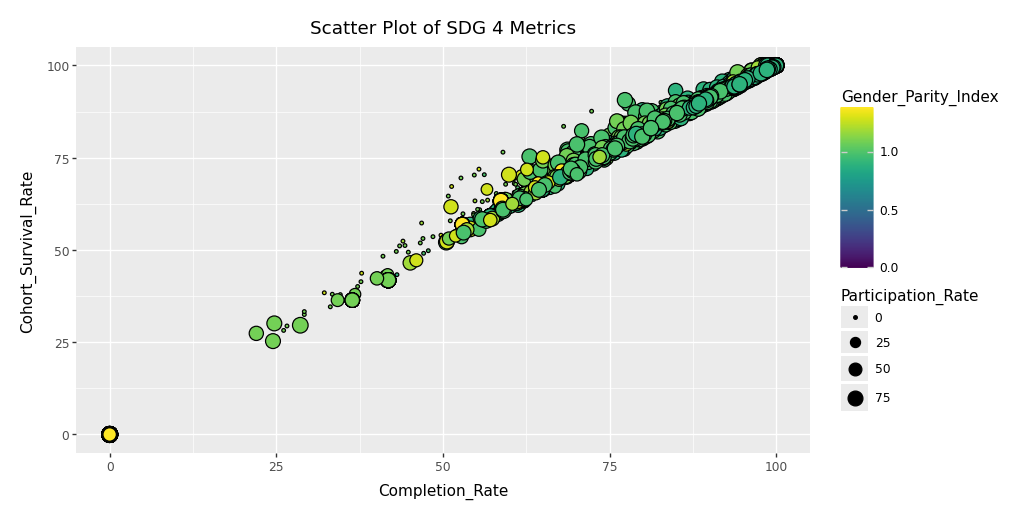

In [ ]:
from plotnine import ggplot, aes, geom_point, theme, labs

# Completion Rate Vs Cohort Survival Rate vs GPI

ggplot(combined_pl.to_pandas(),aes(x='Completion_Rate',y='Cohort_Survival_Rate',fill='Gender_Parity_Index',size='Participation_Rate')) +\
    geom_point() +\
        labs(title = 'Scatter Plot of SDG 4 Metrics') +\
            theme(figure_size=(10, 5))

### 3. Metrics Trend Over Time

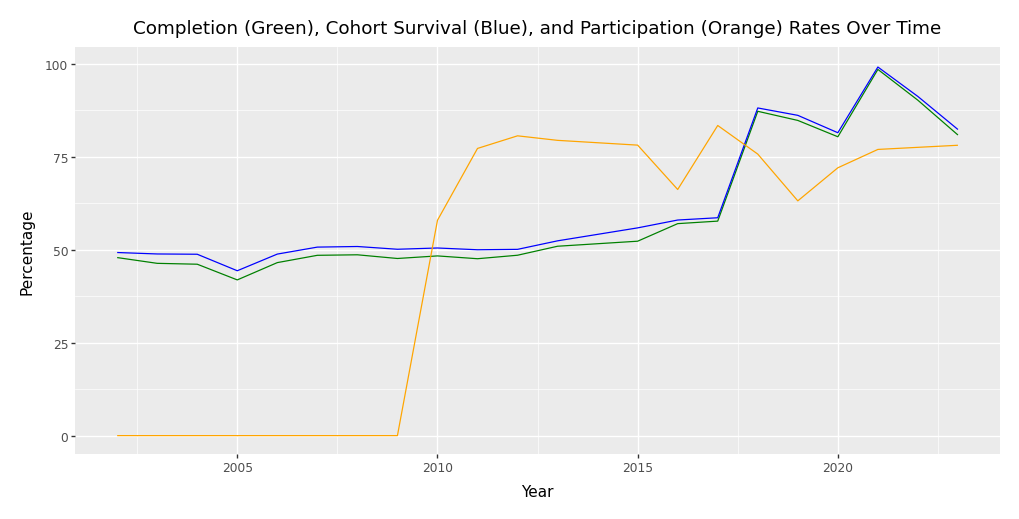

In [92]:
from plotnine import geom_line

ggplot(combined_pl.to_pandas(),aes(x='Year')) +\
    geom_line(aes(y = 'Completion_Rate'),stat='summary',color='green') +\
    geom_line(aes(y = 'Cohort_Survival_Rate'),stat='summary',color='blue') +\
    geom_line(aes(y = 'Participation_Rate'),stat='summary',color='orange') +\
    labs(title = 'Completion (Green), Cohort Survival (Blue), and Participation (Orange) Rates Over Time', y = 'Percentage') +\
    theme(figure_size=(10, 5))

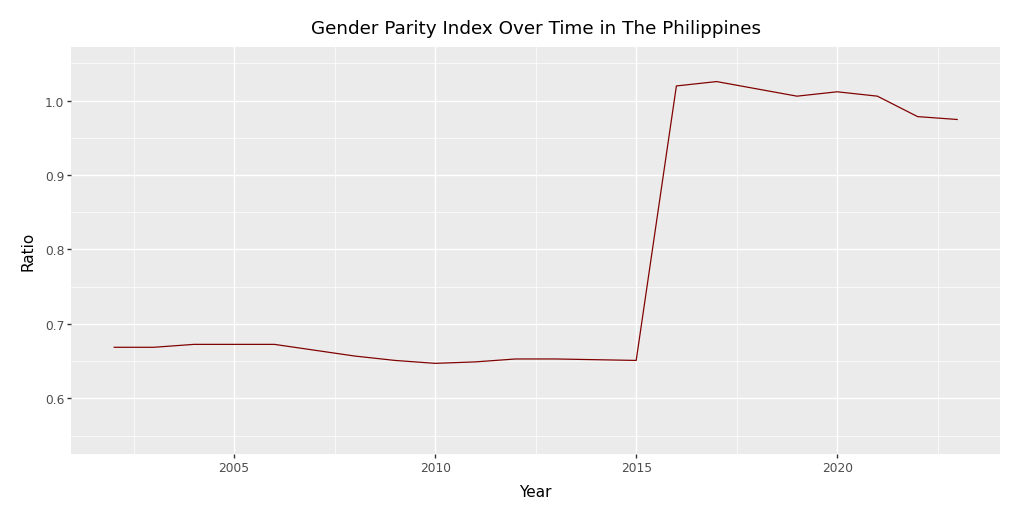

In [93]:
ggplot(combined_pl.to_pandas(),aes(x='Year')) +\
    geom_line(aes(y = 'Gender_Parity_Index'),stat='summary',color='Maroon') +\
        labs(title = 'Gender Parity Index Over Time in The Philippines', y = 'Ratio') +\
            theme(figure_size=(10, 5))

## **Local Statistics**

- Note: In this Section, you can select Filters from Geolocation, Year, Sex, and Level of Education. Given below is a format statistics per Geolocation.

### 1. Average Statistics

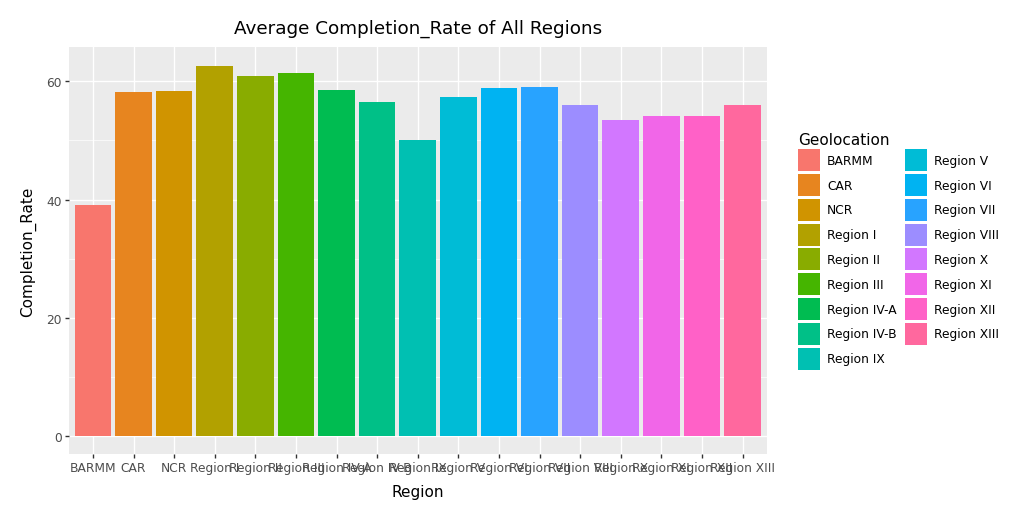

In [ ]:
from plotnine import geom_bar

# Choose a Metric ['Competion_Rate','Cohort_Survival_Rate','Gender_Parity_Index','Participation_Rate']

metric = 'Completion_Rate'


ggplot(combined_pl.to_pandas(),aes(x='Geolocation',y=metric,fill='Geolocation')) +\
    geom_bar(stat='summary') +\
         labs(title = f'Average {metric} of All Regions', x = 'Region', y=metric) +\
            theme(figure_size=(10, 5))


     Geolocation  Year  Completion_Rate  Cohort_Survival_Rate  Gender_Parity_Index  Participation_Rate
0          BARMM  2002            46.65                 49.35                  1.1                0.00
1          BARMM  2003            27.90                 30.95                  1.1                0.00
2          BARMM  2004            31.30                 35.65                  1.1                0.00
3          BARMM  2005            34.75                 36.15                  1.1                0.00
4          BARMM  2006            31.65                 34.15                  1.1                0.00
..           ...   ...              ...                   ...                  ...                 ...
352  Region XIII  2019            95.05                 96.40                  0.9               64.30
353  Region XIII  2020            93.45                 93.95                  0.9               77.60
354  Region XIII  2021            98.05                 98.60            

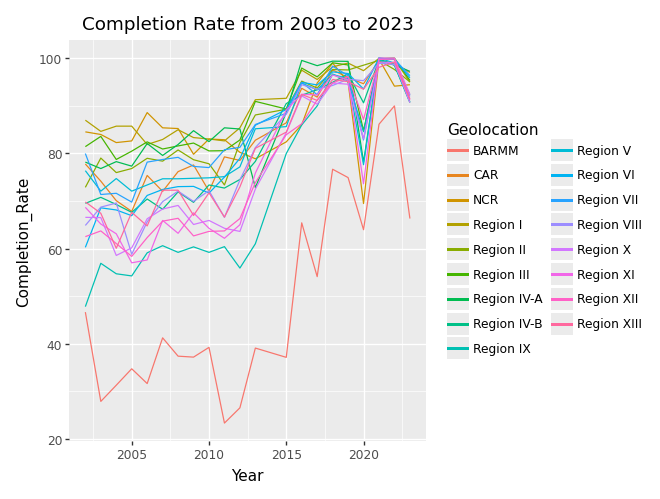

In [107]:
# lvl = Elementary, Junior High, Senior High
lvl = 'Elementary'

temp_data = combined_pl.to_pandas()
# temp_data = temp_data.drop(['Sex', 'Level of Education'], axis=1).groupby(['Geolocation', 'Year']).mean().reset_index()
temp_data = temp_data[temp_data['Level of Education'] == lvl].drop(['Sex', 'Level of Education'], axis=1).groupby(['Geolocation', 'Year']).mean().reset_index()
print(temp_data)

ggplot(temp_data, aes(x = 'Year', y='Completion_Rate')) +\
    geom_line(aes(color='Geolocation')) +\
    labs(
        title='Completion Rate from 2003 to 2023'
    )

### 2. Specific Statistics

#### A. Summary Statistics

In [46]:
# Choose a Region
region = 'Region I'

region_pl = combined_pl.filter(pl.col('Geolocation') == region)

# Average Completion Rate

average_CR = region_pl["Completion_Rate"].mean()

# Average Cohort Survival Rate

average_CSR = region_pl["Cohort_Survival_Rate"].mean()

# Average Gender Parity Index

average_GPI = region_pl["Gender_Parity_Index"].mean()

# Average Participation Rate

average_PR = region_pl["Participation_Rate"].mean()

print(average_CR, average_CSR, average_GPI, average_PR)


62.65972222222223 63.93194444444444 0.7037037037037034 60.25972222222223


#### B. Trends Over Time

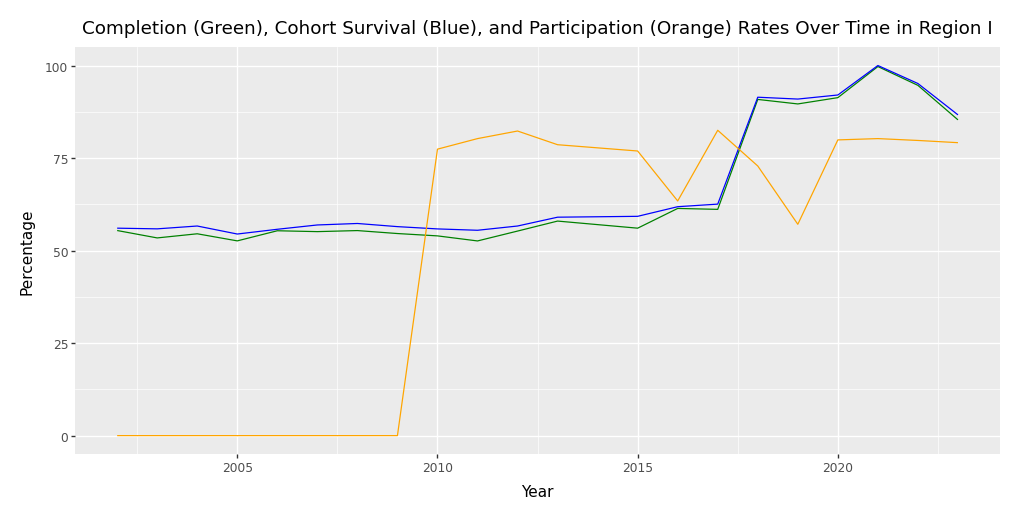

In [48]:
ggplot(region_pl.to_pandas(),aes(x='Year')) +\
    geom_line(aes(y = 'Completion_Rate'),stat='summary',color='green') +\
        geom_line(aes(y = 'Cohort_Survival_Rate'),stat='summary',color='blue') +\
           geom_line(aes(y = 'Participation_Rate'),stat='summary',color='orange') +\
            labs(title = f'Completion (Green), Cohort Survival (Blue), and Participation (Orange) Rates Over Time in {region}', y = 'Percentage') +\
                theme(figure_size=(10, 5))

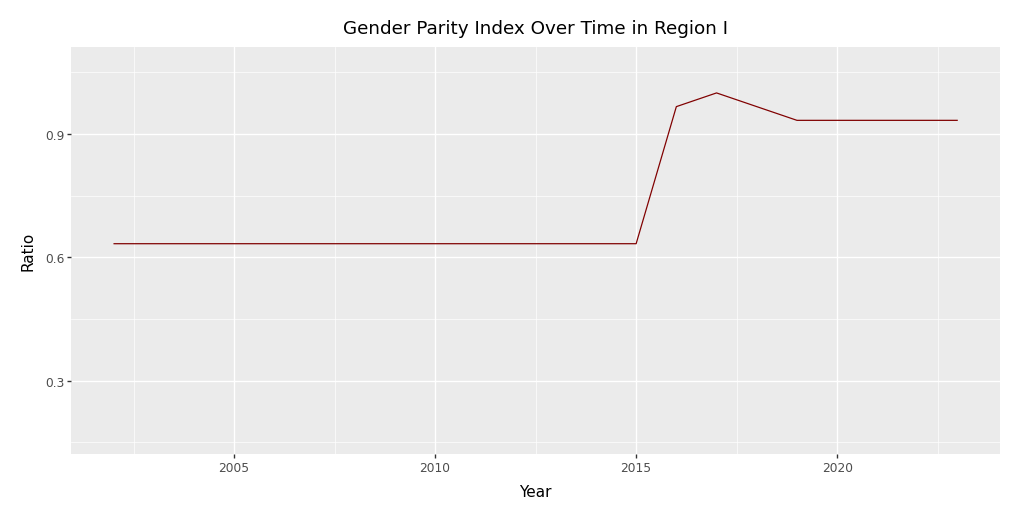

In [53]:
ggplot(region_pl.to_pandas(),aes(x='Year')) +\
    geom_line(aes(y = 'Gender_Parity_Index'),stat='summary',color='Maroon') +\
        labs(title = f'Gender Parity Index Over Time in {region}', y = 'Ratio') +\
            theme(figure_size=(10, 5))

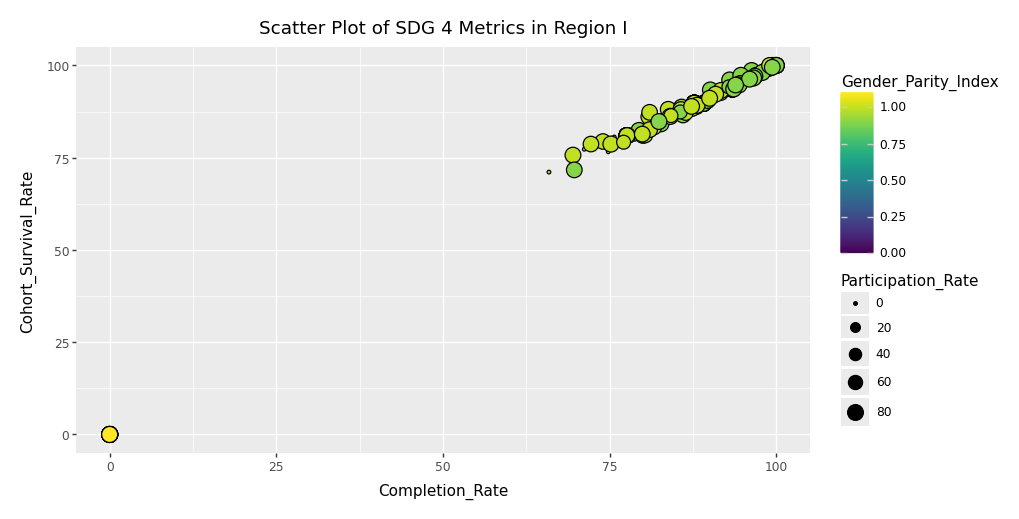

In [50]:
# Completion Rate Vs Cohort Survival Rate vs GPI

ggplot(region_pl.to_pandas(),aes(x='Completion_Rate',y='Cohort_Survival_Rate',fill='Gender_Parity_Index',size='Participation_Rate')) +\
    geom_point() +\
        labs(title = f'Scatter Plot of SDG 4 Metrics in {region}') +\
            theme(figure_size=(10, 5))